In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from pathlib import Path

In [73]:
# Load file
csv = Path("/Users/sukhikaur/Desktop/UCI Class Analysis/vaccination-data.csv")

# Read dataset
who_data = pd.read_csv(csv)
who_data.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Argentina,ARG,AMRO,REPORTING,2022-10-07,109652736.0,41324100,242.617,91.434,37840119,83.725,NaN,2020-12-29,7.0,30810184.0,68.170
1,Australia,AUS,WPRO,REPORTING,2023-07-06,68247343.0,22216819,267.638,87.125,21627933,84.816,NaN,2021-02-21,5.0,14406392.0,56.496
2,Bahrain,BHR,EMRO,REPORTING,2022-12-21,3476633.0,1241174,204.319,72.943,1226796,72.098,NaN,2020-11-04,11.0,1008663.0,59.278
3,British Virgin Islands,VGB,AMRO,REPORTING,2023-06-02,41453.0,19466,137.094,64.378,18261,60.393,NaN,2021-02-11,3.0,3726.0,12.323
4,Egypt,EGY,EMRO,REPORTING,2023-05-21,112673535.0,56907319,110.103,55.609,42337175,41.371,NaN,2021-01-24,10.0,15217352.0,14.870


In [74]:
# Clean data using headers
cleaned_who_data = who_data.set_index('DATE_UPDATED')
cleaned_who_data = who_data[['DATE_UPDATED', 'COUNTRY', 'TOTAL_VACCINATIONS', 'PERSONS_BOOSTER_ADD_DOSE', 'VACCINES_USED']]
cleaned_who_data

,DATE_UPDATED,COUNTRY,TOTAL_VACCINATIONS,PERSONS_BOOSTER_ADD_DOSE,VACCINES_USED
0,2022-10-07,Argentina,109652736.0,30810184.0,NaN
1,2023-07-06,Australia,68247343.0,14406392.0,NaN
2,2022-12-21,Bahrain,3476633.0,1008663.0,NaN
3,2023-06-02,British Virgin Islands,41453.0,3726.0,NaN
4,2023-05-21,Egypt,112673535.0,15217352.0,NaN
...,...,...,...,...,...
224,2023-06-11,Spain,112837406.0,26563654.0,NaN
225,2023-06-11,Switzerland,16755470.0,4996200.0,NaN
226,2023-04-18,Syrian Arab Republic,5090630.0,75881.0,NaN
227,2023-06-26,Timor-Leste,2019384.0,335563.0,NaN


In [75]:
# United States' vaccination rate
us_who_data = cleaned_who_data[cleaned_who_data['COUNTRY']=='United States of America']
us_who_data.head()

,DATE_UPDATED,COUNTRY,TOTAL_VACCINATIONS,PERSONS_BOOSTER_ADD_DOSE,VACCINES_USED
24,2023-06-02,United States of America,668882018.0,116629517.0,NaN


In [96]:
us_who_data['TOTAL_VACCINATIONS'].sum()

668882018.0

In [77]:
us_who_data['PERSONS_BOOSTER_ADD_DOSE'].sum()

116629517.0

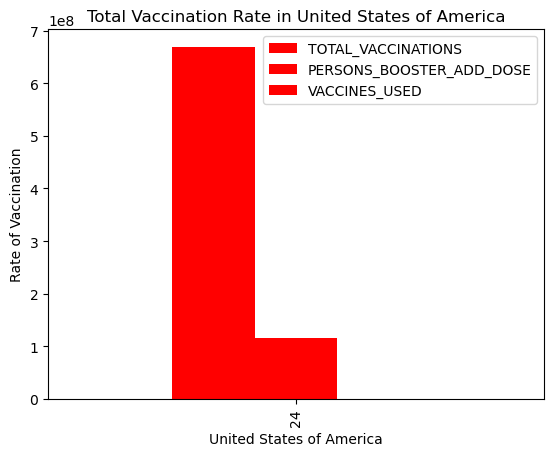

In [99]:
bar_chart = us_who_data.plot.bar(color='r')
plt.xlabel("United States of America")
plt.ylabel("Rate of Vaccination")
plt.title("Total Vaccination Rate in United States of America")
plt.show()

In [78]:
us_who_vaccine_type = us_who_data['VACCINES_USED']
us_who_vaccine_type.head()

24   NaN
Name: VACCINES_USED, dtype: float64

In [79]:
# Italy's vaccination rate
italy_who_data = cleaned_who_data[cleaned_who_data['COUNTRY']=='Italy']
italy_who_data.head()

,DATE_UPDATED,COUNTRY,TOTAL_VACCINATIONS,PERSONS_BOOSTER_ADD_DOSE,VACCINES_USED
209,2023-06-11,Italy,150317622.0,44916242.0,NaN


In [82]:
italy_who_data['TOTAL_VACCINATIONS'].sum()

150317622.0

In [84]:
italy_who_data['PERSONS_BOOSTER_ADD_DOSE'].sum()

44916242.0

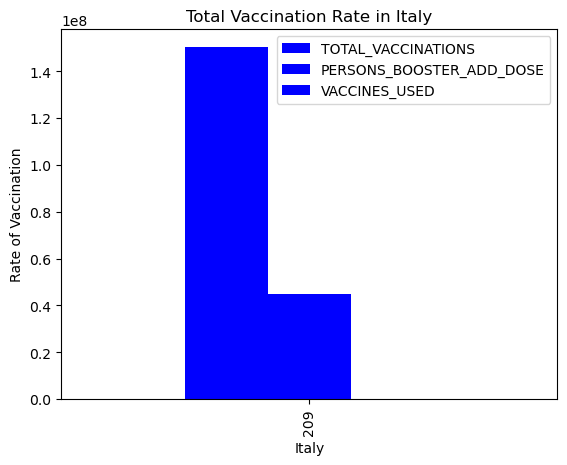

In [100]:
bar_chart = italy_who_data.plot.bar(color='b')
plt.xlabel("Italy")
plt.ylabel("Rate of Vaccination")
plt.title("Total Vaccination Rate in Italy")
plt.show()

In [86]:
italy_who_vaccine_type = italy_who_data['VACCINES_USED']
italy_who_vaccine_type.head()

209   NaN
Name: VACCINES_USED, dtype: float64

In [80]:
# China's vaccination rate
china_who_data = cleaned_who_data[cleaned_who_data['COUNTRY']=='China']
china_who_data.head()

,DATE_UPDATED,COUNTRY,TOTAL_VACCINATIONS,PERSONS_BOOSTER_ADD_DOSE,VACCINES_USED
183,2023-03-23,China,3.515873e+09,833820382.0,NaN


In [87]:
china_who_data['TOTAL_VACCINATIONS'].sum()

3515872818.0

In [88]:
china_who_data['PERSONS_BOOSTER_ADD_DOSE'].sum()

833820382.0

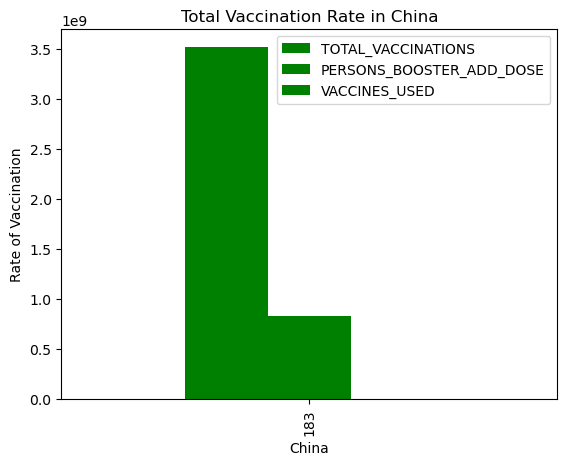

In [101]:
bar_chart = china_who_data.plot.bar(color='g')
plt.xlabel("China")
plt.ylabel("Rate of Vaccination")
plt.title("Total Vaccination Rate in China")
plt.show()

In [89]:
china_who_vaccine_type = china_who_data['VACCINES_USED']
china_who_vaccine_type.head()

183   NaN
Name: VACCINES_USED, dtype: float64